<h1><u>BCSE417P Machine Vision Lab Assignment 1</u></h1><hr>


<h2>AS - 1(A)</h2>24 July 2024


<h3>Task 1:</h3>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Read the Image
image = cv2.imread('/content/images/img1.jpg')  # Replace 'image_path.jpg' with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib


In [4]:
# Step 2: Compute Basic Statistics
mean, stddev = cv2.meanStdDev(image)
mean = mean.flatten()
stddev = stddev.flatten()

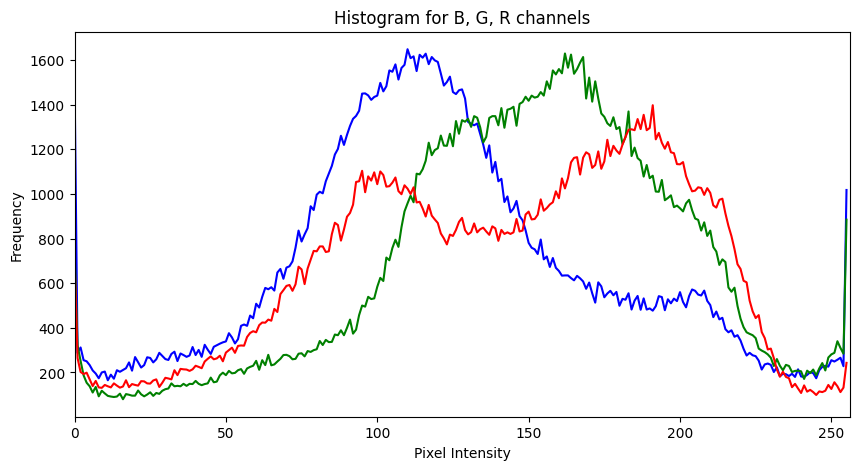

Mean: [123.41215278 149.73614005 142.2383912 ]
Standard Deviation: [54.29019528 49.48033386 55.26948781]


In [5]:
# Calculate histograms for each channel
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogram for B, G, R channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

print(f"Mean: {mean}")
print(f"Standard Deviation: {stddev}")

In [6]:
# Step 3: Convert Color Spaces
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

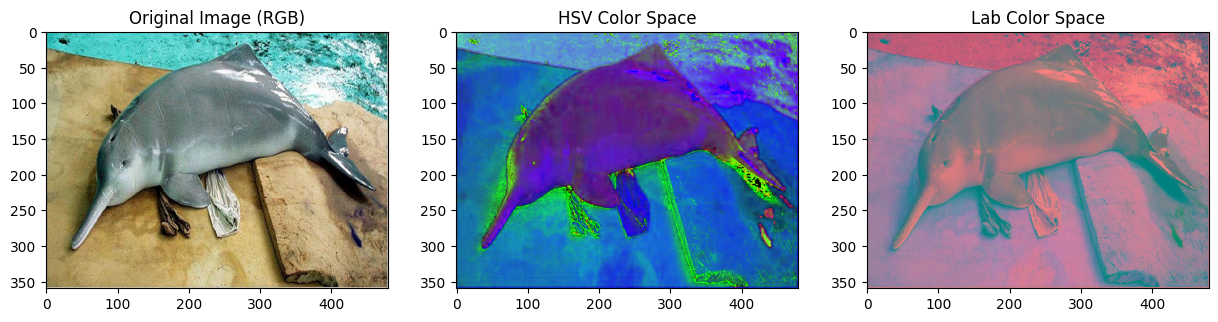

In [9]:
# Display images in different color spaces
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')

plt.subplot(1, 3, 2)
plt.imshow(image_hsv)
plt.title('HSV Color Space')

plt.subplot(1, 3, 3)
plt.imshow(image_lab)
plt.title('Lab Color Space')

plt.show()

To begin with, the process of analyzing an image using OpenCV starts with loading the image. This is typically done using functions like `cv2.imread()`, which reads the image from a file and stores it in an array. This array represents the image data and allows for various manipulations and analyses.

Once the image is loaded, computing basic statistics provides insights into its color characteristics. For each color channel (red, green, blue), we calculate the mean and standard deviation, which gives us an idea of the average color intensity and the variation in color intensity across the image. The mean provides a central value for each channel, indicating the overall color tone, while the standard deviation reveals how much variation there is from this average. Additionally, computing the histogram for each channel shows the distribution of pixel intensities. This histogram helps in understanding the frequency of different color intensities and can be useful for tasks like contrast adjustment.

Furthermore, converting the image to different color spaces, such as HSV (Hue, Saturation, Value) and Lab (Lightness, a*, b*), allows for more nuanced color analysis. The HSV color space separates the image into components that correspond to human perception of color (hue), color intensity (saturation), and brightness (value), making it easier to manipulate and analyze colors in a way that aligns more closely with how we perceive them. On the other hand, the Lab color space is designed to be more perceptually uniform, meaning that the differences in colors are consistent with human perception. This color space includes a luminance channel (Lightness) and two color-opponent channels (a* and b*), which can be particularly useful for color correction and comparison tasks.

By converting the image into these different color spaces, we gain a deeper understanding of its color composition and can perform more advanced image processing operations tailored to specific needs or applications.

<h3>Task 2:</h3>

In [10]:
# 1. Read the Image: Load a grayscale image
image = cv2.imread('/content/images/img2.jpg', cv2.IMREAD_GRAYSCALE)

In [11]:
# 2. Apply Thresholding: Use a fixed threshold value to segment the image
threshold_value = 127  # Example threshold value
_, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)


In [12]:
# 3. Display Results: Show the original and segmented images
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

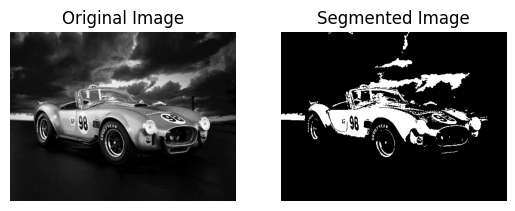

In [13]:
# Display original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

# Show the images
plt.show()

To analyze a grayscale image, the first step is to load the image into the processing environment. This involves reading the image data and converting it into a format suitable for analysis, such as a matrix of pixel intensity values. Each pixel in a grayscale image holds a value representing its brightness, ranging from black to white.

Once the image is loaded, the next step is to apply thresholding. This technique involves selecting a fixed threshold value that determines how pixel values are classified. Pixels with intensity values above the threshold are typically set to one value (often white), while those below the threshold are set to another value (often black). This segmentation process helps in distinguishing different regions or objects within the image based on their brightness.

Finally, to visualize the effects of thresholding, both the original and the segmented images are displayed. The original image provides a reference for comparison, showing the full range of grayscale values, while the segmented image illustrates the result of the thresholding operation. This comparison highlights how effectively the thresholding has segmented the image and can help in evaluating whether the chosen threshold value is appropriate for the specific application.

<h3>Task 3:</h3>

In [14]:
# 1. Read the Image: Load an image with objects of different colors
image = cv2.imread('/content/images/img4.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [15]:
# 2. Convert to HSV: Convert the image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [16]:
# 3. Apply Color Thresholding: Use color thresholds to segment objects of a specific color
# Define the color range for thresholding (Example: Red color range)
lower_bound = np.array([0, 100, 100])  # Lower HSV bound for the color
upper_bound = np.array([10, 255, 255])  # Upper HSV bound for the color


In [17]:
# Apply the threshold
mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

# Segment the image by applying the mask
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)


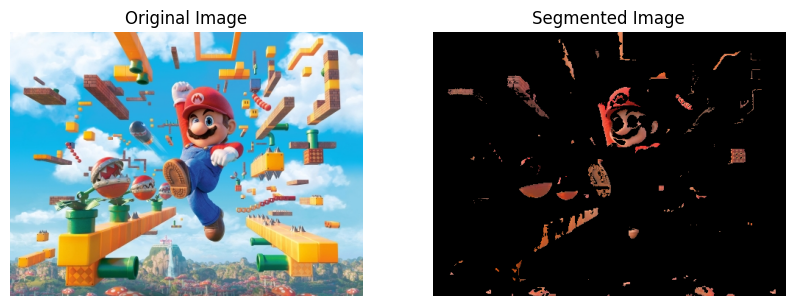

In [18]:
# 4. Display Results: Show the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image)
plt.axis('off')

plt.show()

To begin, the process starts with loading an image that features objects of various colors. This image serves as the basis for further analysis and processing. Once the image is loaded, it needs to be converted from the RGB color space to the HSV (Hue, Saturation, Value) color space. This conversion is crucial because HSV separates color information (hue) from intensity (saturation and value), which often simplifies the task of isolating specific colors in the image.

After converting the image to HSV, the next step involves applying color thresholding. This technique allows for the segmentation of objects based on their color by defining specific ranges for hue, saturation, and value. For example, if the goal is to isolate red objects, thresholds are set that correspond to the hue values typically associated with red, while also considering saturation and value ranges to refine the segmentation. This results in a binary mask where pixels falling within the defined color range are highlighted.

Finally, the results of the segmentation are displayed. This typically involves showing both the original image and the segmented output side by side. The segmented image highlights only the areas of interest based on the color thresholds, making it easier to analyze or process specific colored objects within the original image. This method is commonly used in various applications such as object detection, image analysis, and computer vision tasks.

<hr>

<h2>AS - 1(B)</h2>24 July 2024

<h3>Task 1:</h3>

In [19]:
import cv2
import matplotlib.pyplot as plt

In [20]:
# Load the grayscale image
image = cv2.imread('/content/images/img1.jpg', cv2.IMREAD_GRAYSCALE)

In [21]:
# Apply the negative transformation
negative_image = 255 - image

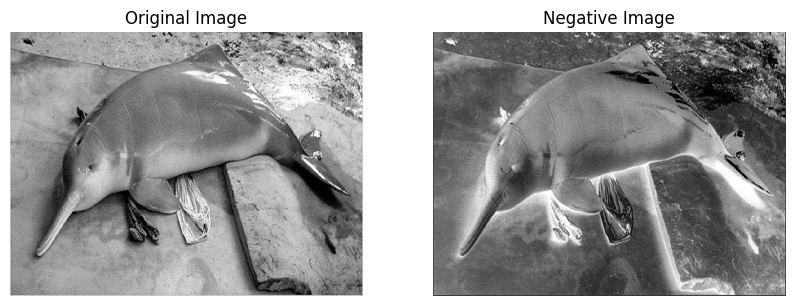

In [22]:
# Display the original and the negative image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Negative image
plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

plt.show()

To process a grayscale image, the first step involves loading the image into a suitable environment or software capable of handling image files. Grayscale images contain shades of gray, which means each pixel represents an intensity value ranging from black to white. In such images, the pixel values typically span from 0 (black) to 255 (white), with various shades of gray in between.

Once the image is loaded, the next step is to apply the image negative transformation. This transformation is a common technique in image processing where each pixel's intensity is inverted. For a grayscale image, the negative transformation is achieved by subtracting the pixel value from the maximum intensity value, which is 255. Specifically, for each pixel with an intensity value \( I \), the new intensity value \( I' \) in the negative image is computed as \( I' = 255 - I \). This results in a reversal of the grayscale values: black becomes white, white becomes black, and all intermediate shades are inverted correspondingly.

After applying the negative transformation, both the original and the negative images can be displayed side by side for comparison. This visualization allows one to observe how the negative transformation alters the image, providing insights into the differences between the original and its inverted counterpart. The original image typically shows natural grayscale tones, while the negative image presents an inverse spectrum of these tones, offering a different perspective on the image's content and structure.

<h3>Task 2:</h3>

In [23]:
import numpy as np

In [24]:
# Function to apply gamma correction
def adjust_gamma(image, gamma=1.0):
    # Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Apply gamma correction using the lookup table
    return cv2.LUT(image, table)


In [25]:
# Load a grayscale image
image = cv2.imread('/content/images/img3.jpg', cv2.IMREAD_GRAYSCALE)


In [26]:
# Apply gamma correction with different gamma values
gamma_0_5 = adjust_gamma(image, gamma=0.5)
gamma_1_0 = adjust_gamma(image, gamma=1.0)
gamma_2_0 = adjust_gamma(image, gamma=2.0)


In [27]:
# Display the original and gamma-corrected images
titles = ['Original', 'Gamma = 0.5', 'Gamma = 1.0', 'Gamma = 2.0']
images = [image, gamma_0_5, gamma_1_0, gamma_2_0]

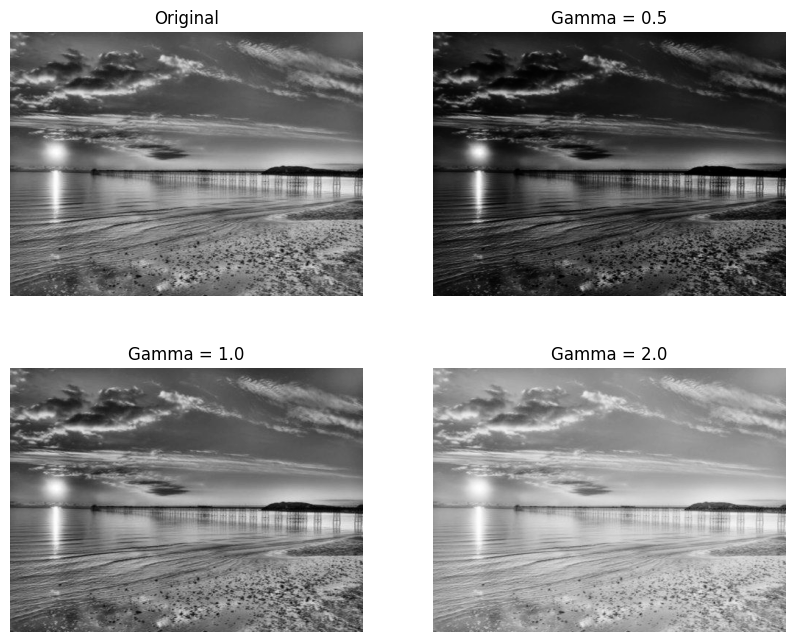

In [28]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

To begin with, loading a grayscale image involves importing an image where each pixel's intensity is represented by a single value, typically ranging from 0 (black) to 255 (white) in an 8-bit image. This grayscale image serves as the starting point for further image processing.

Gamma correction is a technique used to adjust the brightness and contrast of an image. It involves applying a nonlinear transformation to the pixel values based on a gamma value, γ. When γ is less than 1.0, such as 0.5, the transformation increases the brightness of the image, making the darker areas lighter and enhancing contrast. Conversely, when γ is greater than 1.0, such as 2.0, the transformation reduces brightness, making the lighter areas even lighter and the darker areas darker, which can increase contrast but might also result in loss of detail in extreme areas.

For γ = 1.0, the gamma correction has no effect, as the image remains unchanged. This value represents the linear case where no adjustment is made to the pixel values.

Displaying the original and gamma-corrected images allows for a visual comparison of how different gamma values affect the image. With γ = 0.5, you would observe a brighter image with enhanced visibility of details in the darker regions. On the other hand, γ = 2.0 would result in a darker image with more pronounced contrast between light and dark areas, potentially losing detail in the highlights and shadows. By examining these variations, one can better understand the impact of gamma correction on image perception and adjust it accordingly for desired visual outcomes.

<h3>Task 3:</h3>

In [30]:
# Step 1: Load a grayscale image
image_path = '/content/images/img1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [31]:
# Step 2: Apply log transformation
# c is a constant used for scaling the log-transformed values
c = 255 / np.log(1 + np.max(image))
log_transformed = c * (np.log(1 + image))

<ipython-input-31-cc54cdcef588>:4: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * (np.log(1 + image))


In [32]:
# Convert to uint8
log_transformed = np.array(log_transformed, dtype=np.uint8)


<ipython-input-32-d3fc47d5d6aa>:2: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype=np.uint8)


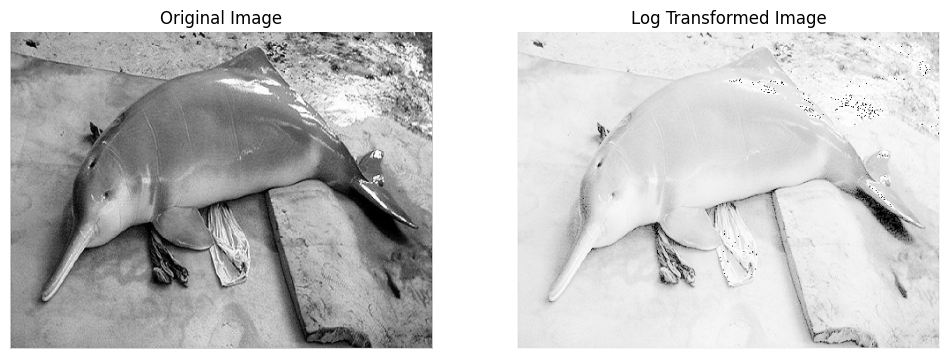

In [33]:
# Step 3: Display the original and the log-transformed image
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Log-transformed image
plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.show()

Loading a grayscale image is the first step in applying a log transformation. A grayscale image represents intensity values where each pixel is a single value corresponding to the lightness or darkness of that pixel, ranging from black to white. The log transformation is a nonlinear operation that enhances the visibility of details in the darker regions of an image while compressing the dynamic range of pixel values in brighter regions.

To apply the log transformation, the pixel values of the grayscale image are first normalized to a range suitable for logarithmic computation, typically by scaling them between 0 and 1. The log transformation is then applied using the formula output = c . log(1 + input), where \( c \) is a constant that scales the output values appropriately. This transformation compresses the higher intensity values and expands the lower intensity values, which can reveal more details in areas that were previously too dark or indistinguishable.

When displaying the original and the log-transformed images side by side, the difference becomes apparent. The original image shows the raw intensity values as captured, while the log-transformed image highlights more subtle variations in intensity. The log transformation is particularly useful in applications where details in dark regions need to be enhanced for better analysis or visualization. The resulting log-transformed image often provides a clearer view of fine details that were previously hidden in the shadows of the original image.

<h3>Task 4:</h3>

In [34]:
# Load the grayscale image
image = cv2.imread('/content/images/img3.jpg', cv2.IMREAD_GRAYSCALE)

In [35]:
# Apply image negative transformation
negative_image = 255 - image

In [36]:
# Apply gamma correction (γ = 2.0)
gamma = 2.0
gamma_corrected_image = np.array(255 * (image / 255) ** gamma, dtype='uint8')


In [37]:
# Apply log transformation
c = 255 / np.log(1 + np.max(image))
log_transformed_image = c * np.log(1 + image)
log_transformed_image = np.array(log_transformed_image, dtype='uint8')


<ipython-input-37-811d73049162>:3: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * np.log(1 + image)
<ipython-input-37-811d73049162>:4: RuntimeWarning: invalid value encountered in cast
  log_transformed_image = np.array(log_transformed_image, dtype='uint8')


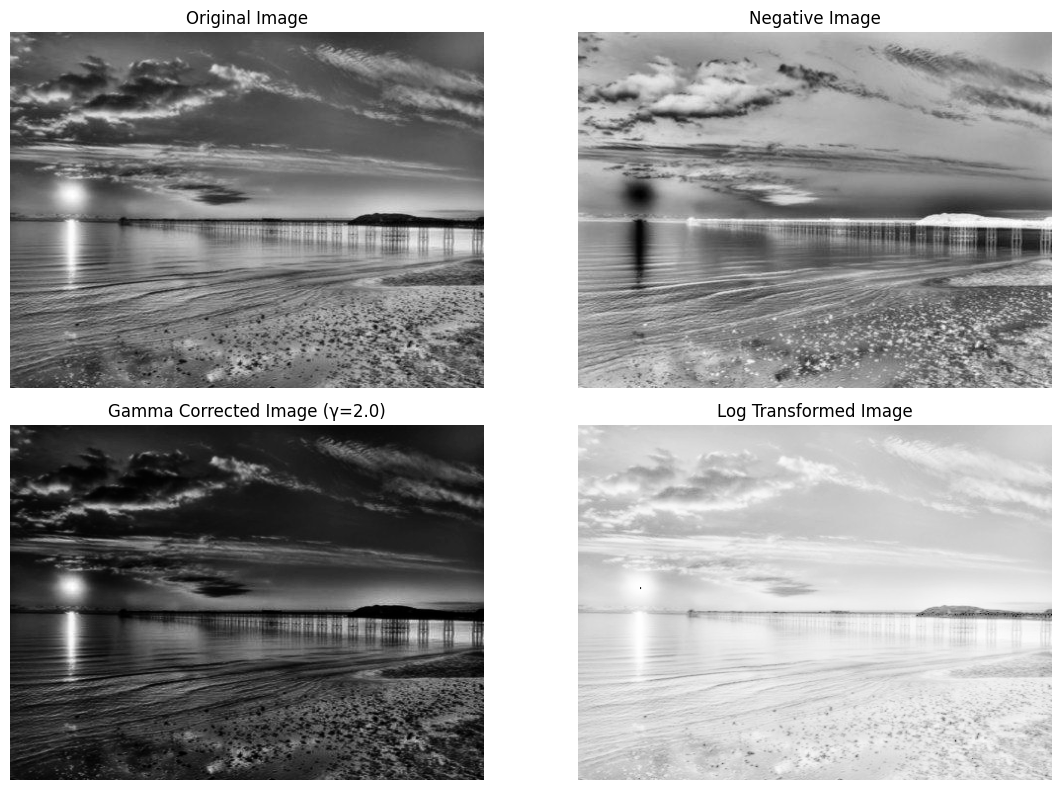

In [38]:
# Display the original and transformed images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title(f'Gamma Corrected Image (γ={gamma})')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

To process a grayscale image, you would typically start by loading the image into your workspace. Once you have the image, various transformations can be applied to explore different effects and enhancements.

Applying an image negative is a fundamental image processing operation where each pixel's intensity is inverted. For a grayscale image, if the original pixel value is I, the negative pixel value is calculated as 255 - I. This transformation essentially flips the intensity values, making dark areas lighter and vice versa, which can highlight features that are less obvious in the original image.

Next, gamma correction involves adjusting the brightness of an image using the formula I_new = 255 * ((I / 255) ^ gamma), where gamma is a gamma value. In this case, with gamma = 2.0, the transformation will increase the contrast of the image. Higher gamma values make the dark regions darker and bright regions brighter, which can enhance the details and features in those areas.

Logarithmic transformation, on the other hand, adjusts the pixel values based on the logarithm of the intensity values. The formula for this transformation is I_new = c * log(1 + I), where c is a constant that scales the output. Log transformation compresses the range of intensity values, making it particularly useful for enhancing details in darker regions of the image while maintaining the brightness in lighter areas.

By displaying the original image alongside the images after applying each transformation, you can effectively compare and contrast the effects of these operations. The original image provides a baseline, while the negative emphasizes the contrast in the opposite direction, gamma correction enhances contrast selectively based on pixel intensity, and log transformation offers a different perspective on how intensity ranges can be manipulated to reveal details that might not be as apparent in the original image. This comparative visualization is crucial for understanding how each transformation impacts image characteristics and aids in selecting the appropriate technique for specific imaging needs.

<h3>Task 5:</h3>

In [40]:
# Load the color image
image = cv2.imread('/content/images/img2.jpg')
# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [41]:
# Split the image into R, G, and B channels
R, G, B = cv2.split(image)

In [42]:
# Define a function to apply negative transformation
def negative_transformation(channel):
    return 255 - channel

# Define a function to apply gamma correction
def gamma_correction(channel, gamma=2.2):
    gamma_corrected = np.power(channel / 255.0, gamma) * 255
    return np.uint8(gamma_corrected)

# Define a function to apply log transformation
def log_transformation(channel):
    c = 255 / np.log(1 + np.max(channel))
    log_transformed = c * np.log(1 + channel)
    return np.uint8(log_transformed)

In [43]:
# Apply transformations to each channel
R_neg = negative_transformation(R)
G_neg = negative_transformation(G)
B_neg = negative_transformation(B)

R_gamma = gamma_correction(R)
G_gamma = gamma_correction(G)
B_gamma = gamma_correction(B)

R_log = log_transformation(R)
G_log = log_transformation(G)
B_log = log_transformation(B)

<ipython-input-42-ec36bbd44ce4>:13: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + channel)
<ipython-input-42-ec36bbd44ce4>:14: RuntimeWarning: invalid value encountered in cast
  return np.uint8(log_transformed)


In [44]:
# Merge the transformed channels
image_neg = cv2.merge((R_neg, G_neg, B_neg))
image_gamma = cv2.merge((R_gamma, G_gamma, B_gamma))
image_log = cv2.merge((R_log, G_log, B_log))


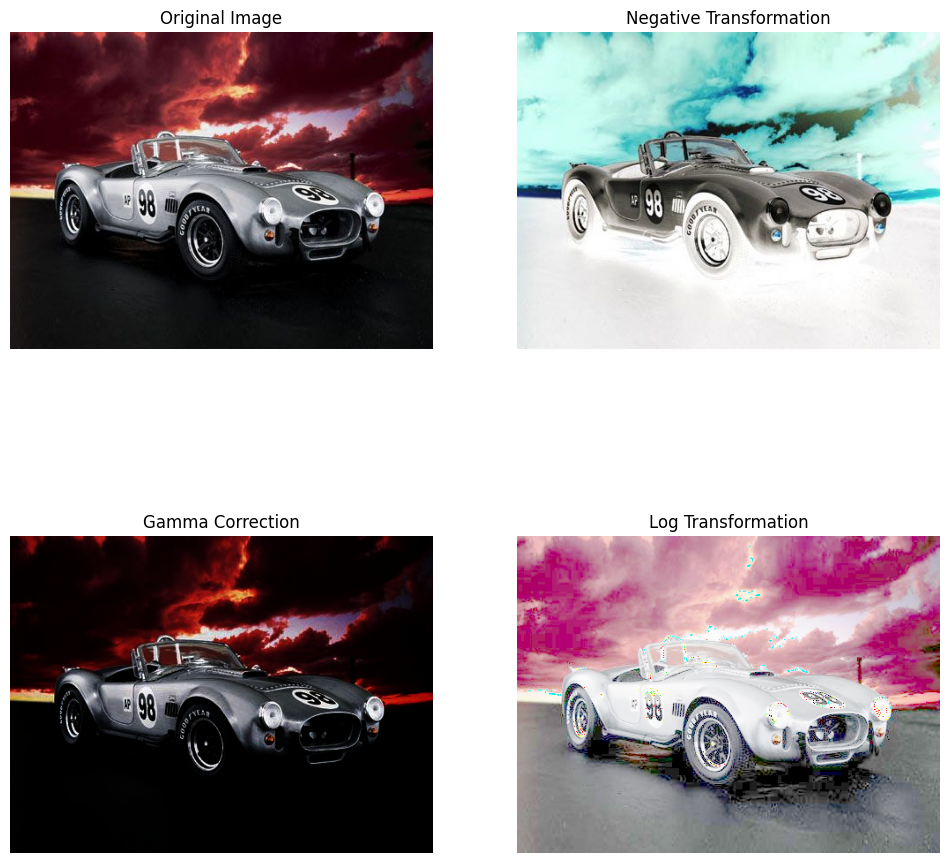

In [45]:
# Display the original and transformed images
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Negative Transformation')
plt.imshow(image_neg)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Gamma Correction')
plt.imshow(image_gamma)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Log Transformation')
plt.imshow(image_log)
plt.axis('off')

plt.show()

To start with image processing, the first step is to load a color image into the system. This image consists of three color channels: red (R), green (G), and blue (B), which together form the full-color representation. By splitting the image into its individual R, G, and B channels, we can independently manipulate each channel to achieve various effects.

Applying image negative to each channel involves inverting the pixel values. This is done by subtracting each pixel value from the maximum value possible (typically 255 for 8-bit images), resulting in a color inversion where bright areas become dark and vice versa. The gamma correction adjusts the brightness and contrast of each channel by applying a nonlinear transformation. This is particularly useful for correcting the overall luminance of the image, making it either brighter or darker depending on the gamma value. Finally, the log transformation is applied to each channel, which compresses the range of pixel values and enhances the details in darker regions of the image.

After performing these transformations on each channel separately, the channels are then merged back together to reconstruct the color image. This reconstructed image incorporates the effects of the negative, gamma correction, and log transformation applied to each channel. Displaying both the original and transformed images allows for a visual comparison, highlighting the impact of each processing technique on the overall appearance of the image. This process demonstrates how different image manipulations can alter the visual characteristics of an image, offering a range of effects that can be useful in various applications, from artistic enhancements to practical adjustments for improved visibility or analysis.

<hr>

<h2>AS - 1(C)</h2>31 July 2024

<h3>Task 1:</h3>

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# 1. Load and Display an Image
image_path = '/content/images/img4.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


(-0.5, 479.5, 359.5, -0.5)

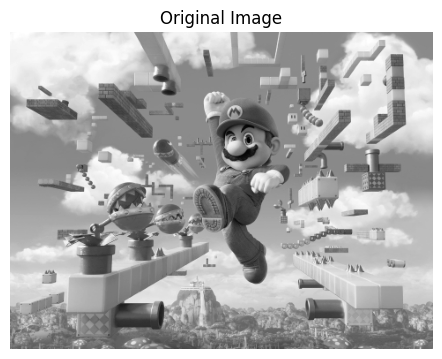

In [48]:
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

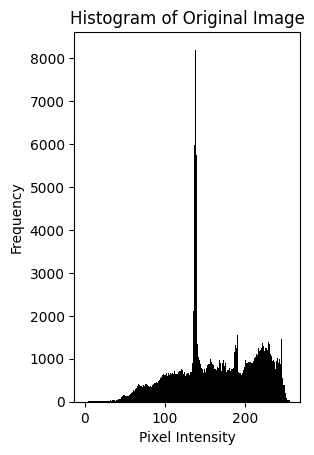

In [49]:
# Plot the histogram of the original image
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [50]:
# 2. Calculate and Plot Histogram Manually
histogram = np.bincount(image.ravel(), minlength=256)


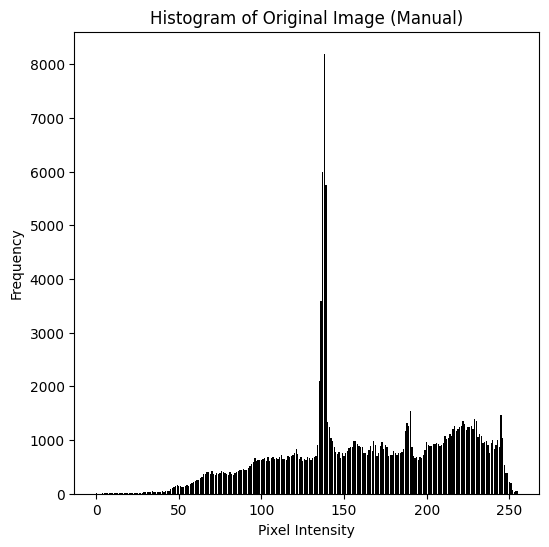

In [51]:
# Plot the histogram manually calculated
plt.figure(figsize=(6, 6))
plt.bar(range(256), histogram, color='black')
plt.title('Histogram of Original Image (Manual)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [52]:
# 3. Calculate Cumulative Distribution Function (CDF)
cdf = histogram.cumsum()
cdf_normalized = cdf * histogram.max() / cdf.max()  # Normalize CDF

# Normalize CDF to the range [0, 255]
cdf_normalized = (cdf_normalized / cdf_normalized[-1] * 255).astype(np.uint8)


In [53]:
# 4. Apply Histogram Equalization
equalized_image = cdf[image]


(-0.5, 479.5, 359.5, -0.5)

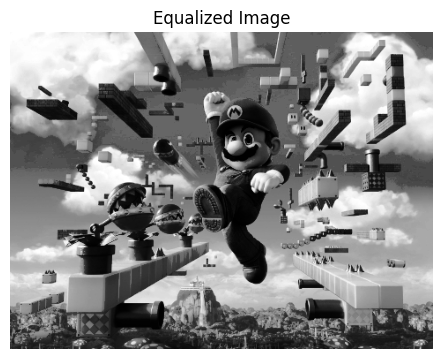

In [54]:
# Display the equalized image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

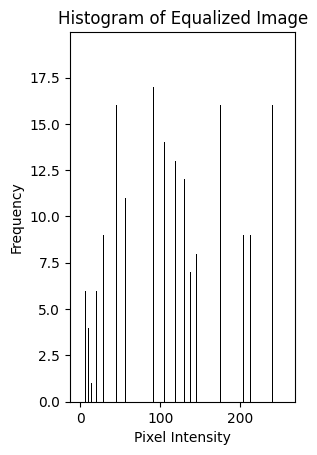

In [55]:
# Plot the histogram of the equalized image
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


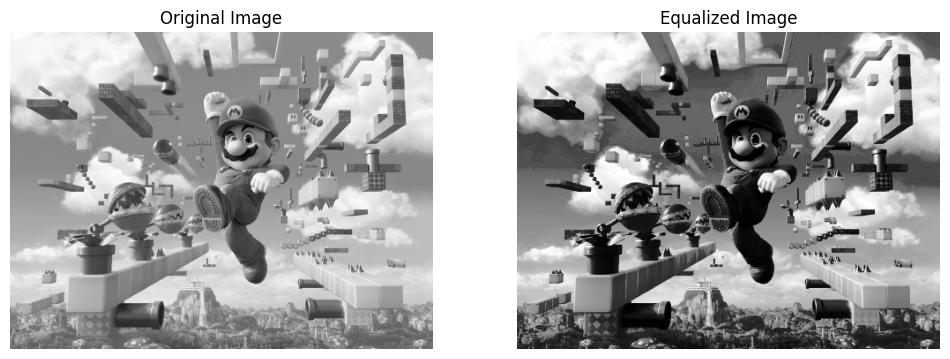

In [56]:
# 5. Compare Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

The process of loading and displaying a grayscale image provides a fundamental view of its pixel intensity distribution. By plotting the histogram of the original image, we can visually assess how pixel intensities are distributed across the range of possible values. This histogram highlights areas where pixel values are more or less concentrated, giving insight into the image’s contrast and overall tonal range.

When manually calculating and plotting the histogram, the aim is to understand how pixel intensities are distributed without relying on automated tools. This manual calculation reinforces the importance of histogram analysis in image processing and ensures accuracy in the subsequent steps of histogram equalization.

The computation of the Cumulative Distribution Function (CDF) from the histogram involves summing the probabilities of pixel intensities to determine the cumulative frequency distribution. Normalizing the CDF to the range [0, 255] scales the values to match the pixel intensity range used in grayscale images, enabling effective mapping for histogram equalization.

Applying histogram equalization involves mapping the original pixel values to new values based on the normalized CDF. This process aims to enhance the contrast of the image by redistributing pixel intensities to cover a broader range. The equalized image is then displayed, and its histogram is plotted to show the improved distribution of pixel intensities.

Comparing the original and equalized images reveals significant differences in visual quality and histogram distributions. The original image may have limited contrast and uneven pixel intensity distribution, while the equalized image typically exhibits enhanced contrast and a more uniform distribution of pixel intensities. This comparison demonstrates how histogram equalization can improve the visual quality of an image by making details more discernible and contrast more pronounced.

<h3>Task 2:</h3>

In [57]:
def adaptive_histogram_equalization(image):
    # Convert image to YUV color space
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # Apply AHE to the Y channel (luminance)
    y, u, v = cv2.split(img_yuv)
    y = cv2.equalizeHist(y)

    # Merge channels and convert back to BGR
    img_yuv = cv2.merge([y, u, v])
    img_ahe = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    return img_ahe

In [58]:
def contrast_limited_adaptive_histogram_equalization(image):
    # Convert image to YUV color space
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # Apply CLAHE to the Y channel (luminance)
    y, u, v = cv2.split(img_yuv)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y = clahe.apply(y)

    # Merge channels and convert back to BGR
    img_yuv = cv2.merge([y, u, v])
    img_clahe = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    return img_clahe

In [59]:
def display_results(original, ahe, clahe):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 4, 1)
    plt.title('Original')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title('Histogram Equalized')
    hist_equalized = cv2.equalizeHist(cv2.cvtColor(original, cv2.COLOR_BGR2GRAY))
    hist_equalized_color = cv2.cvtColor(hist_equalized, cv2.COLOR_GRAY2BGR)
    plt.imshow(cv2.cvtColor(hist_equalized_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title('Adaptive Histogram Equalization')
    plt.imshow(cv2.cvtColor(ahe, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title('Contrast Limited AHE')
    plt.imshow(cv2.cvtColor(clahe, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

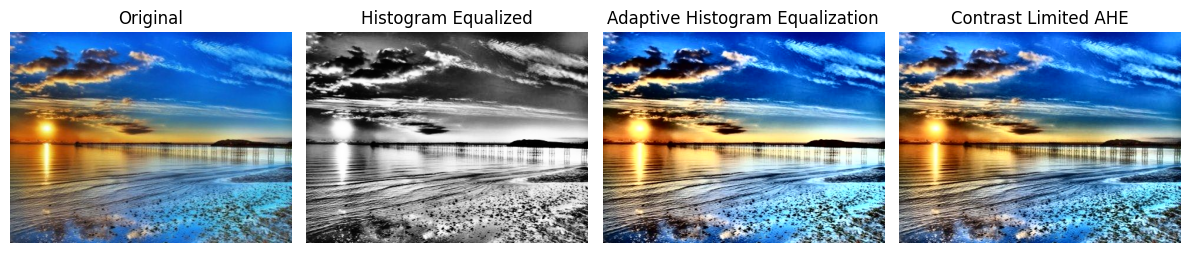

In [60]:
if __name__ == '__main__':
    # Load image
    image_path = '/content/images/img3.jpg'
    original_image = cv2.imread(image_path)

    # Apply AHE and CLAHE
    ahe_image = adaptive_histogram_equalization(original_image)
    clahe_image = contrast_limited_adaptive_histogram_equalization(original_image)

    # Display results
    display_results(original_image, ahe_image, clahe_image)

In evaluating the results of histogram equalization techniques, the differences between the original image, standard histogram equalized image, Adaptive Histogram Equalization (AHE), and Contrast Limited Adaptive Histogram Equalization (CLAHE) become evident in both visual quality and histogram distributions. The original image typically has a limited dynamic range, which can result in poor contrast and detail visibility, especially in regions with uniform intensity. Standard histogram equalization enhances overall contrast by redistributing pixel intensities across the entire image, which can lead to over-enhancement in areas with low local contrast and introduce artifacts or noise in regions with extreme pixel values.

Adaptive Histogram Equalization (AHE) addresses this by dividing the image into smaller tiles and performing histogram equalization on each tile independently. This localized approach improves contrast in various regions but can produce noticeable boundaries or discontinuities between tiles, which may affect the image's visual quality. AHE generally enhances details and contrast in local regions but might exacerbate noise in homogeneous areas.

Contrast Limited Adaptive Histogram Equalization (CLAHE) builds upon AHE by introducing a limit on the contrast enhancement within each tile. This contrast limitation helps to control noise amplification and prevent excessive contrast in homogeneous regions, resulting in a more visually balanced image with smoother transitions between tiles. CLAHE tends to offer a better balance between enhancing local contrast and minimizing noise, providing a more natural and uniform appearance across the image.

Comparing these methods, the original image often appears less detailed and contrast-rich compared to the enhanced versions. Standard histogram equalization may present overly aggressive contrast adjustments, while AHE improves local details but can introduce artifacts. CLAHE generally produces the most refined result, offering improved contrast and detail while maintaining a more aesthetically pleasing and artifact-free appearance. The histograms of the enhanced images show a more spread distribution of pixel intensities, with CLAHE achieving a more controlled and visually appealing distribution compared to the other methods.








<h3>Task 3:</h3>

In [61]:
# Load the color image
image = cv2.imread('/content/images/img1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [62]:
# Split the image into its Red, Green, and Blue channels
r, g, b = cv2.split(image_rgb)

# Apply histogram equalization to each channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)


In [63]:
# Merge the equalized channels back into an RGB image
equalized_image_rgb = cv2.merge((r_eq, g_eq, b_eq))


In [64]:
# Convert images to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
equalized_image_rgb = cv2.cvtColor(equalized_image_rgb, cv2.COLOR_BGR2RGB)


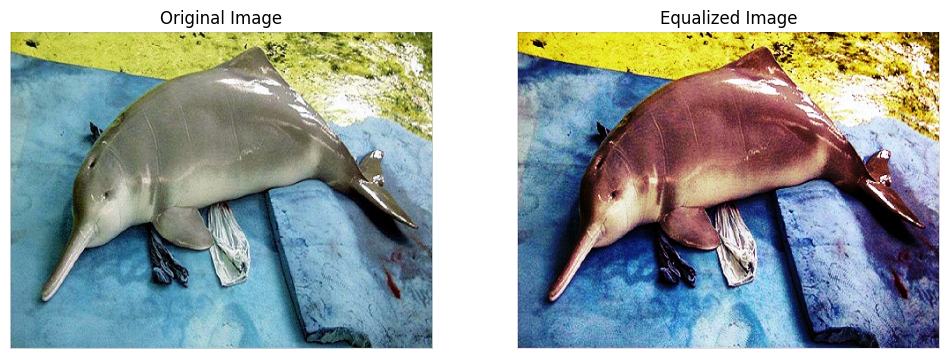

In [65]:
# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image_rgb)
plt.axis('off')

plt.show()

After applying histogram equalization to each color channel of an image, the visual effects can be quite distinct compared to the original image. Histogram equalization enhances the contrast in an image by redistributing the intensity values across the available range, which can significantly improve visibility in areas that were previously too dark or too bright. When this technique is applied individually to the Red, Green, and Blue channels, each channel's contrast is enhanced separately, leading to a more balanced representation of colors.

The original image typically has a limited dynamic range in each color channel, which might result in certain colors appearing less vibrant or details being obscured. By equalizing each channel, the intensity distribution is spread out more evenly, making the colors in the resulting image more vivid and the details more pronounced. However, this process can also lead to some unintended color artifacts. For example, equalizing each channel separately may cause color shifts or introduce noise, as the relative balance between the colors can be altered.

The final reconstructed image from the equalized channels often displays enhanced contrast and potentially more vivid colors compared to the original. The increased contrast in each channel can make details more visible, but the overall color balance might shift slightly. This shift can sometimes lead to unnatural color appearances or saturation issues, especially in images with complex color interactions.

In summary, histogram equalization applied to individual color channels can improve contrast and visibility in specific regions of an image but may also introduce color distortions or artifacts. The resulting image often shows a marked difference in both contrast and color saturation compared to the original, highlighting the trade-offs between enhanced detail and potential color distortions.

<h3>Task 4:</h3>

In [66]:
def apply_histogram_equalization(image_path, title):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)

    # Display the original and equalized images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'Original {title}')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Equalized {title}')
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')

    plt.show()

In [67]:
# Paths to your images
medical_image_path = '/content/images/medical.jpg'
satellite_image_path = '/content/images/satellite.jpeg'
document_image_path = '/content/images/document.jpeg'
night_vision_image_path = '/content/images/night.jpeg'


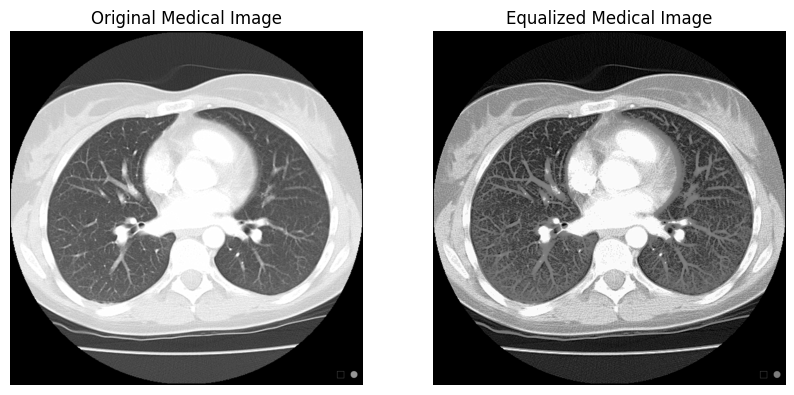

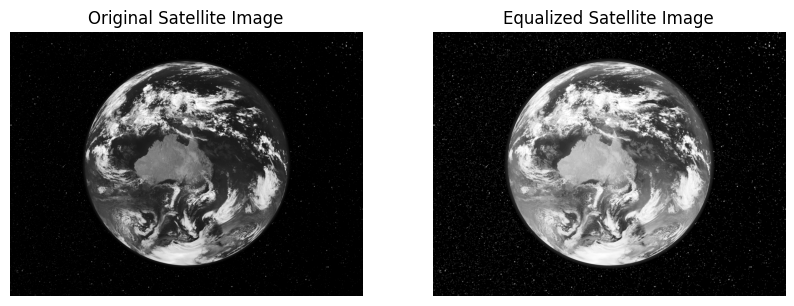

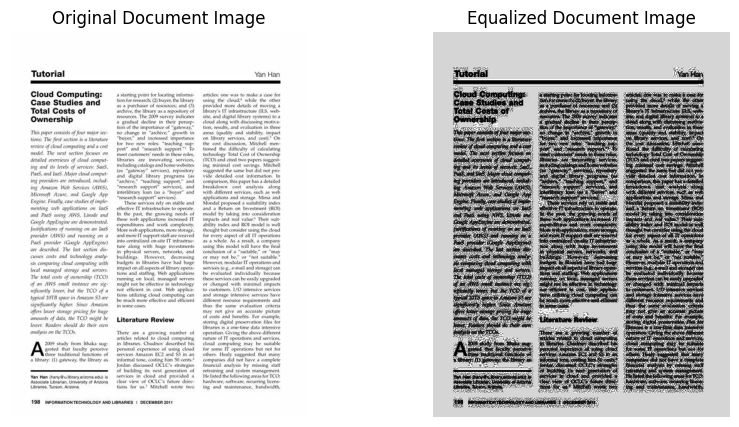

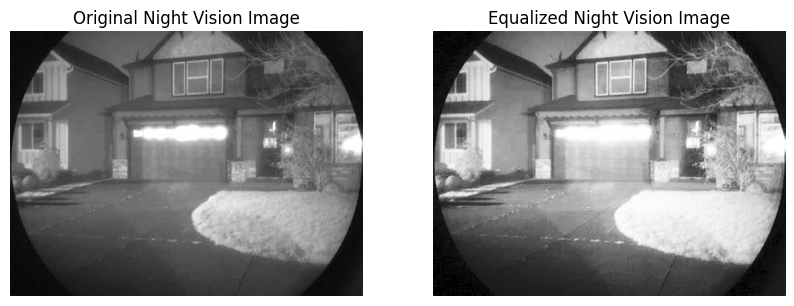

In [68]:
# Apply histogram equalization and visualize results
apply_histogram_equalization(medical_image_path, 'Medical Image')
apply_histogram_equalization(satellite_image_path, 'Satellite Image')
apply_histogram_equalization(document_image_path, 'Document Image')
apply_histogram_equalization(night_vision_image_path, 'Night Vision Image')

Histogram equalization is a powerful image processing technique that can significantly enhance the visibility of features across various types of images, including medical imaging, satellite imagery, document scanning, and night vision.

In medical imaging, such as X-rays and MRIs, histogram equalization can substantially improve the visibility of critical features. Medical images often suffer from poor contrast due to the limited range of pixel intensities. By redistributing the intensity levels more evenly across the image, histogram equalization enhances contrast and makes subtle details more distinguishable. This improved contrast can aid radiologists in identifying abnormalities and making more accurate diagnoses by revealing details that may have been obscured in the original image.

For satellite imagery, histogram equalization can enhance both contrast and detail by adjusting the image’s intensity distribution. Satellite images often contain large areas of uniform brightness or varying illumination due to atmospheric conditions. Equalization helps in making subtle features and variations in terrain more visible by expanding the range of pixel intensities. This process allows for a clearer view of landforms, vegetation, and other important features, which is crucial for applications such as environmental monitoring and urban planning.

When applied to scanned documents, histogram equalization improves text readability and clarity. Scanned documents can suffer from uneven lighting and poor contrast, leading to text that may be difficult to read. By redistributing the intensity levels, histogram equalization enhances the contrast between text and background, making the text stand out more clearly. This enhancement is particularly beneficial for digitizing old or faded documents where text visibility is compromised.

In night vision applications, histogram equalization plays a crucial role in improving object visibility in low-light conditions. Night vision images often have a limited dynamic range, with objects appearing as silhouettes against a dark background. Equalization enhances the contrast between these objects and their surroundings by stretching the intensity range, making it easier to distinguish between different objects and details. This enhancement is essential for activities such as surveillance and navigation in dark environments, where detecting and interpreting visual information can be challenging.

Overall, histogram equalization is a versatile technique that enhances image quality by improving contrast and visibility across different types of images, making it a valuable tool in various fields.

<h3>Task 5:</h3>

In [69]:
# Load the image
image_path = '/content/images/lowcont.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

(-0.5, 959.5, 639.5, -0.5)

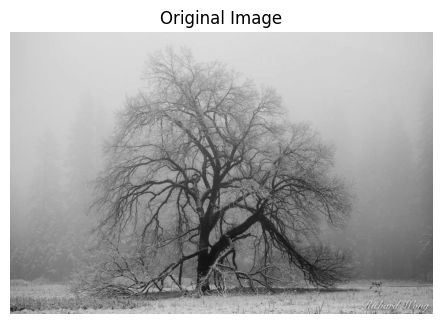

In [70]:
# Display the original image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

In [71]:
# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(image)

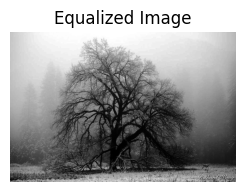

In [72]:
# Display the histogram equalized image
plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

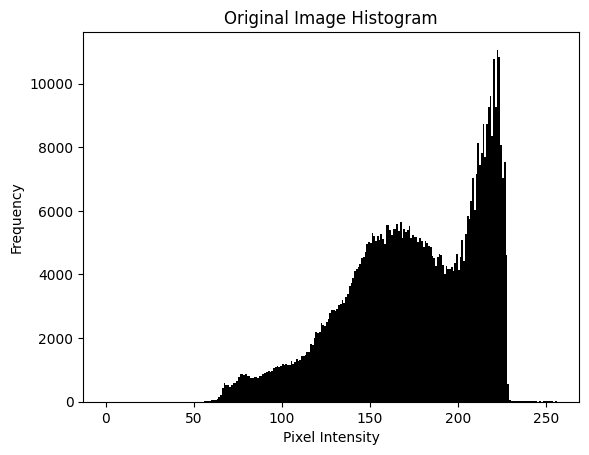

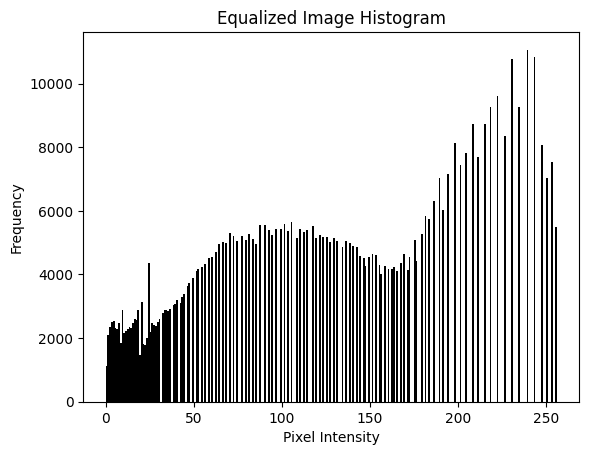

In [73]:
# Analyze results
def plot_histogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.show()

# Plot histograms for original and equalized images
plot_histogram(image, 'Original Image Histogram')
plot_histogram(equalized_image, 'Equalized Image Histogram')

Histogram equalization is a widely used technique in image processing to enhance the contrast of images, particularly those with low contrast or uniform intensity distributions. When applied to a low contrast image, histogram equalization effectively redistributes the pixel intensity values across the entire range of possible values, resulting in a more balanced histogram. This redistribution improves the visibility of details and features that were previously obscured or indistinguishable due to the lack of contrast.

In practice, the original low contrast image typically exhibits a histogram that is concentrated in a narrow range of intensity values, indicating that the image lacks variation in brightness and contrast. After performing histogram equalization, the resulting image usually displays a more evenly spread histogram, indicating that the intensity values have been expanded across the available range. This process enhances the overall contrast and makes various features in the image more distinguishable.

The improvement in contrast and feature visibility is often significant. Details that were previously difficult to discern due to the uniform intensity distribution become more pronounced. For instance, subtle textures, edges, and variations in the image become more apparent, facilitating better analysis and interpretation of the image content. Histogram equalization addresses low contrast issues by increasing the dynamic range of intensity values, thus providing a more comprehensive representation of the image’s features and improving its overall visual quality.

<h3>Task 6:</h3>

In [74]:
def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dimensions = (width, height)
    resized_image = cv2.resize(image, dimensions, interpolation=cv2.INTER_LINEAR)
    return resized_image

In [75]:
def apply_histogram_equalization(image):
    if len(image.shape) == 2:  # Grayscale image
        return cv2.equalizeHist(image)
    else:  # Color image
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        yuv[:, :, 0] = cv2.equalizeHist(yuv[:, :, 0])
        return cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

In [76]:
def plot_images(original, scaled_images):
    fig, axes = plt.subplots(1, len(scaled_images) + 1, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    for ax, (scale, image) in zip(axes[1:], scaled_images.items()):
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(f'Scaled {scale}%')
        ax.axis('off')

    plt.show()


In [77]:
def main(image_path):
    image = cv2.imread(image_path)
    scales = [50, 100, 200]
    scaled_images = {}

    for scale in scales:
        resized_image = resize_image(image, scale)
        equalized_image = apply_histogram_equalization(resized_image)
        scaled_images[scale] = equalized_image

    plot_images(image, scaled_images)


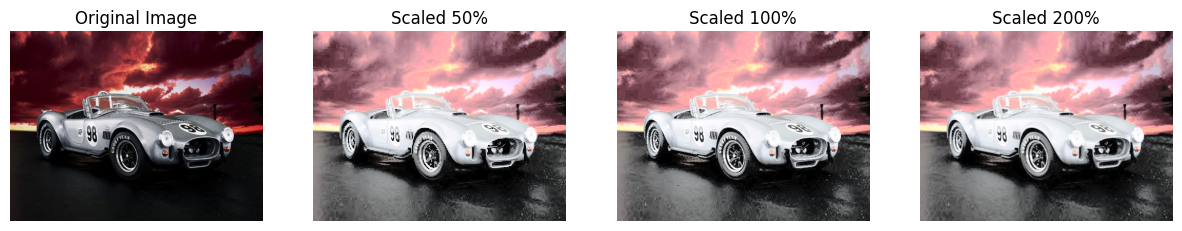

In [78]:
if __name__ == "__main__":
    image_path = '/content/images/img2.jpg'  # Replace with your image path
    main(image_path)

When analyzing the effects of histogram equalization on images resized to different scales, several observations come into play. Rescaling an image to different sizes—such as 50%, 100%, and 200%—modifies the number of pixels, which impacts how histogram equalization alters the image.

At a reduced scale, such as 50%, the image has fewer pixels and therefore less detailed information. When histogram equalization is applied, it can lead to noticeable changes in contrast, but the results might be less pronounced compared to the original size. The reason is that the fewer pixels in the resized image limit the range of pixel values available for equalization, which can reduce the effectiveness of the contrast enhancement.

Conversely, when scaling up to 200%, the image has more pixels, but these are interpolated based on the original image data, which can introduce artifacts or blurring. Histogram equalization on this larger image may amplify these artifacts, making the contrast adjustments more noticeable but potentially at the cost of introducing distortions. The increased pixel count allows for a broader range of pixel values to be adjusted, which can enhance contrast more aggressively, but it may also accentuate noise and details that were not prominent in the original size.

In summary, the scale of an image significantly affects the outcome of histogram equalization. Smaller scales may result in less pronounced equalization effects due to reduced pixel information, while larger scales can show more dramatic contrast changes but with potential artifacts. The key is to balance between enhancing image details and maintaining visual fidelity.

<h3>Task 7:</h3>

In [79]:
def load_image(image_path):
    """Load an image from a file path."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")
    return image

In [80]:
def apply_histogram_equalization(image):
    """Apply histogram equalization to an image."""
    return cv2.equalizeHist(image)

In [81]:
def plot_images(original, equalized):
    """Plot original and equalized images side by side."""
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Equalized Image')
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')

    plt.show()

In [82]:
def evaluate_images(original, equalized):
    """Evaluate and print the comparison between original and equalized images."""
    original_hist = cv2.calcHist([original], [0], None, [256], [0, 256])
    equalized_hist = cv2.calcHist([equalized], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Histogram of Original Image')
    plt.plot(original_hist)
    plt.xlim([0, 256])

    plt.subplot(1, 2, 2)
    plt.title('Histogram of Equalized Image')
    plt.plot(equalized_hist)
    plt.xlim([0, 256])

    plt.show()


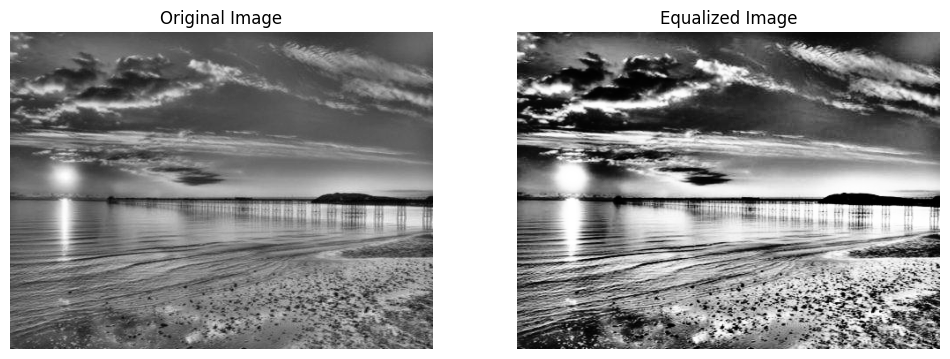

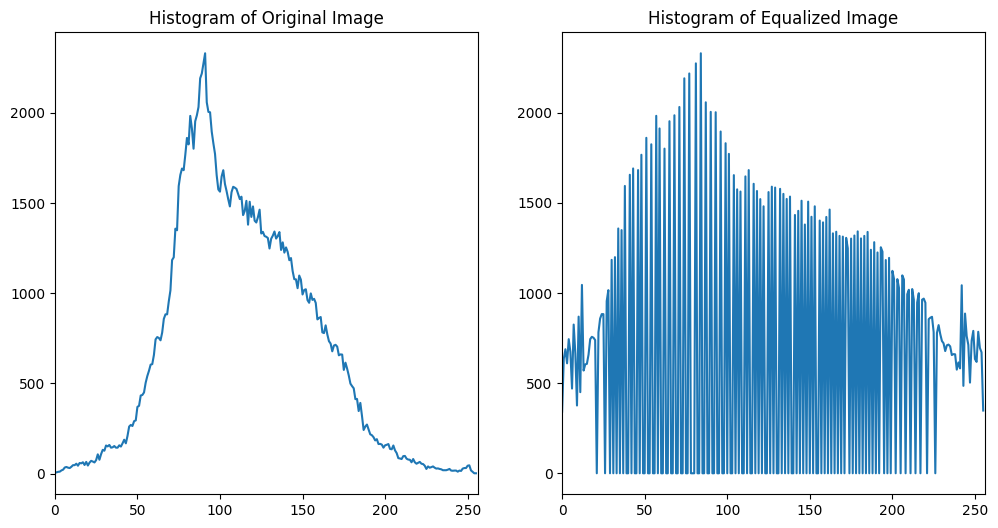

In [83]:
# Example usage
image_path = '/content/images/img3.jpg'
original_image = load_image(image_path)
equalized_image = apply_histogram_equalization(original_image)

plot_images(original_image, equalized_image)
evaluate_images(original_image, equalized_image)

Histogram equalization is a powerful technique used to enhance the contrast and detail in images. When applied to images with varying levels of detail and contrast, it redistributes the intensity values across the histogram, leading to a more uniform distribution of pixel intensities. This process often results in images with improved visibility of details that may have been obscured by poor contrast in the original images.

By performing histogram equalization, the enhancement of image clarity becomes evident. In images with low contrast, where the pixel values are concentrated in a narrow range, histogram equalization stretches the intensity range, making dark areas darker and bright areas brighter. This expansion in dynamic range helps to reveal subtle details that were previously lost. In images with high contrast, equalization can prevent over-exposure or under-exposure, thereby improving the overall visibility of details.

In scenarios where images are used for visual analysis, histogram equalization proves to be particularly beneficial. For instance, in medical imaging or satellite imagery, enhanced contrast allows for better examination of critical features and anomalies. By adjusting the pixel intensity distribution, histogram equalization facilitates more accurate interpretation and analysis, making it an invaluable tool for applications requiring high levels of detail and clarity.

<h3>Task 8:</h3>

In [84]:
# Load the image
image_path = '/content/images/img4.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [85]:
# Perform initial segmentation using thresholding
_, initial_segmented = cv2.threshold(original_image, 127, 255, cv2.THRESH_BINARY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(original_image)

# Perform segmentation on the equalized image
_, equalized_segmented = cv2.threshold(equalized_image, 127, 255, cv2.THRESH_BINARY)


(-0.5, 479.5, 359.5, -0.5)

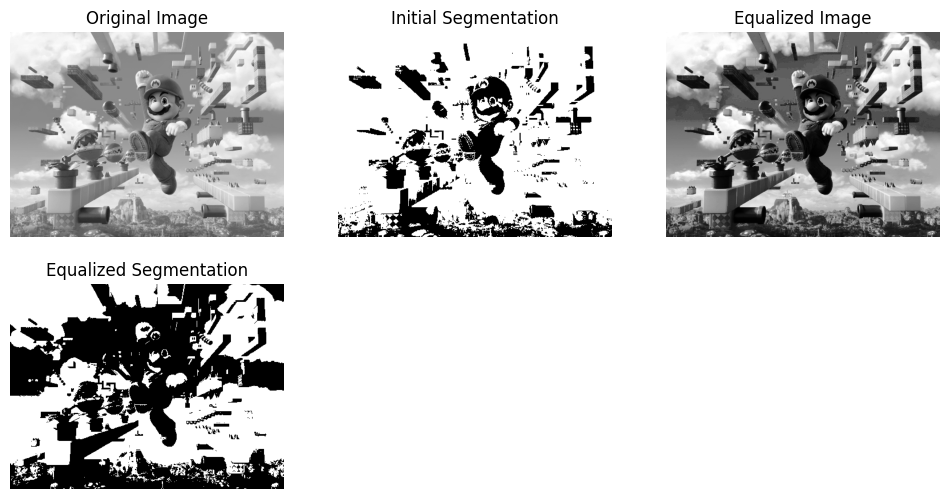

In [89]:
# Compare segmentation results
plt.figure(figsize=(12, 6))

# Original Image and Segmentation
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Initial Segmentation')
plt.imshow(initial_segmented, cmap='gray')
plt.axis('off')

# Equalized Image and Segmentation
plt.subplot(2, 3, 3)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Equalized Segmentation')
plt.imshow(equalized_segmented, cmap='gray')
plt.axis('off')

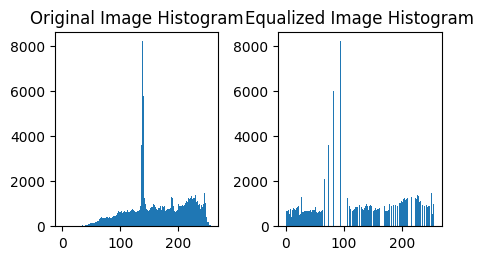

In [90]:
# Histograms
plt.subplot(2, 3, 5)
plt.title('Original Image Histogram')
plt.hist(original_image.ravel(), 256, [0, 256])

plt.subplot(2, 3, 6)
plt.title('Equalized Image Histogram')
plt.hist(equalized_image.ravel(), 256, [0, 256])

plt.tight_layout()
plt.show()

Histogram equalization is a technique used to enhance the contrast of an image by redistributing its intensity levels. When applied to an image before performing segmentation, it can have a significant impact on the results. In the context of segmentation, which involves partitioning an image into regions based on certain criteria, the effectiveness of the process can vary based on the preprocessing steps applied.

Initially, when segmentation is performed on the original image, the results are influenced by the image’s original contrast and intensity distribution. In cases where there is poor contrast between different regions of interest, segmentation methods like thresholding or region-based approaches might struggle to accurately delineate boundaries. The resulting segmented regions may be less distinct, potentially leading to inaccuracies or incomplete segmentation.

Applying histogram equalization modifies the image’s intensity distribution, increasing the contrast between different regions. This often makes the boundaries between different segments more pronounced and distinct. When segmentation is then performed on this enhanced image, the results typically show improved accuracy and effectiveness. The enhanced contrast helps in differentiating between regions more clearly, which can lead to more precise segmentation.

However, the impact of histogram equalization is not always uniformly positive. In some cases, it may amplify noise or enhance unwanted features, which can adversely affect segmentation performance. The changes in the image histogram can introduce new variations that might interfere with the segmentation process if the algorithm is not robust enough to handle these variations.

In summary, histogram equalization generally improves segmentation by increasing contrast, making regions more distinct and easier to segment. Nonetheless, its effectiveness can be influenced by the characteristics of the original image and the nature of the segmentation algorithm used.

<hr>